# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 사용자 로그인 시간 분석

In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('C:/workspace/wassup3/05_Data_Analysis/data/mini.csv')
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [5]:
data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [6]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [11]:
df = pd.DataFrame(data)

target_counts = df['target'].value_counts()
print(target_counts)

target
1    6199
0    3801
Name: count, dtype: int64


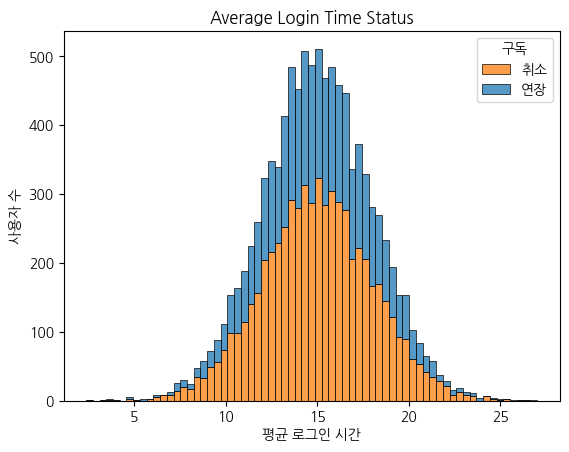

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import koreanize_matplotlib

sns.histplot(data, x='average_login_time', hue='target', multiple='stack')
plt.title('Average Login Time Status')
plt.xlabel('평균 로그인 시간')
plt.ylabel('사용자 수')
plt.legend(title='구독', labels=['취소', '연장'])

plt.savefig('Average Login Time Status.png')

plt.show()

In [17]:
correlation_matrix = data[['average_login_time', 'target']].corr()
print(correlation_matrix)

                    average_login_time    target
average_login_time            1.000000  0.162365
target                        0.162365  1.000000


✔️상관계수 1에 가까울수록 두 변수의 관계가 강하다는 의미    
average_login_time과 target 간의 상관 계수는 약 0.162로, 매우 약한 양의 상관 관계

# 월간 활동적인 학습 일수 분석

In [25]:
print(data['monthly_active_learning_days'].describe())

count    10000.000000
mean        12.545400
std          6.932239
min          1.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: monthly_active_learning_days, dtype: float64


In [26]:
correlation_matrix2 = data[['monthly_active_learning_days', 'target']].corr()
print(correlation_matrix2) 

                              monthly_active_learning_days    target
monthly_active_learning_days                      1.000000  0.004876
target                                            0.004876  1.000000


✔️상관관계 매우 낮음

In [31]:
counts = data.groupby(['monthly_active_learning_days', 'target']).size().unstack(fill_value=0).reset_index()
counts.columns = ['monthly_active_learning_days', 'target_0', 'target_1']

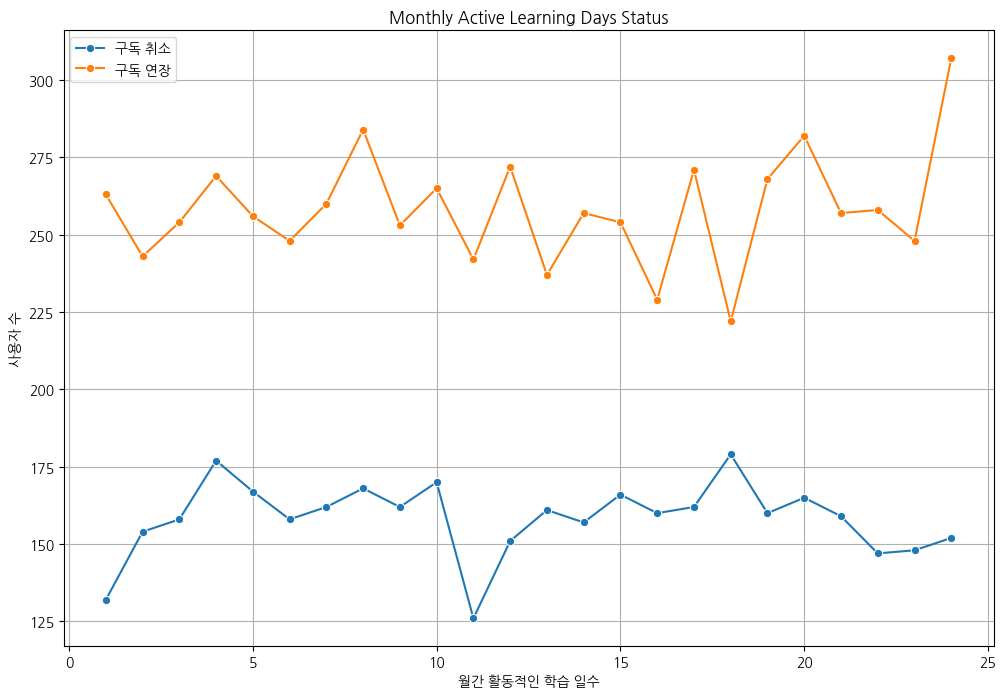

In [133]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=counts, x='monthly_active_learning_days', y='target_0', marker='o', label='구독 취소')
sns.lineplot(data=counts, x='monthly_active_learning_days', y='target_1', marker='o', label='구독 연장')
plt.title('Monthly Active Learning Days Status')
plt.xlabel('월간 활동적인 학습 일수')
plt.ylabel('사용자 수')
plt.legend()
plt.grid(True)

plt.savefig('Monthly Active Learning Days Status.png')
plt.show()

In [34]:
print(data['preferred_difficulty_level'].unique())

['Low' 'Medium' 'High']


In [35]:
data['preferred_difficulty_level'] = data['preferred_difficulty_level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [36]:
print(data['subscription_type'].unique())

['Basic' 'Premium']


In [38]:
data['subscription_type'] = data['subscription_type'].map({'Basic': 0, 'Premium': 1})

In [39]:
correlation_matrix_full = data[['subscription_duration', 'recent_login_time', 'average_login_time', 'average_time_per_learning_session', 'monthly_active_learning_days', 'total_completed_courses', 'recent_learning_achievement', 'abandoned_learning_sessions', 'community_engagement_level', 'preferred_difficulty_level', 'subscription_type', 'customer_inquiry_history', 'payment_pattern', 'target']].corr()
print(correlation_matrix_full)

                                   subscription_duration  recent_login_time  \
subscription_duration                           1.000000           0.014754   
recent_login_time                               0.014754           1.000000   
average_login_time                             -0.000031          -0.006113   
average_time_per_learning_session               0.006324          -0.004650   
monthly_active_learning_days                    0.002193          -0.015338   
total_completed_courses                        -0.001662          -0.000142   
recent_learning_achievement                     0.007875           0.005768   
abandoned_learning_sessions                     0.014414          -0.015882   
community_engagement_level                      0.002114          -0.005486   
preferred_difficulty_level                     -0.016938           0.008860   
subscription_type                              -0.002887          -0.018172   
customer_inquiry_history                       -0.00

✔️ 구독 유형과 커뮤니티 참여수가 0.450195로 그나마 상관계수가 높다. 한 번 봐보자

# 구독 유형과 커뮤니티 참여수

In [41]:
data['subscription_type'] = data['subscription_type'].map({0: 'Basic', 1: 'Premium'})

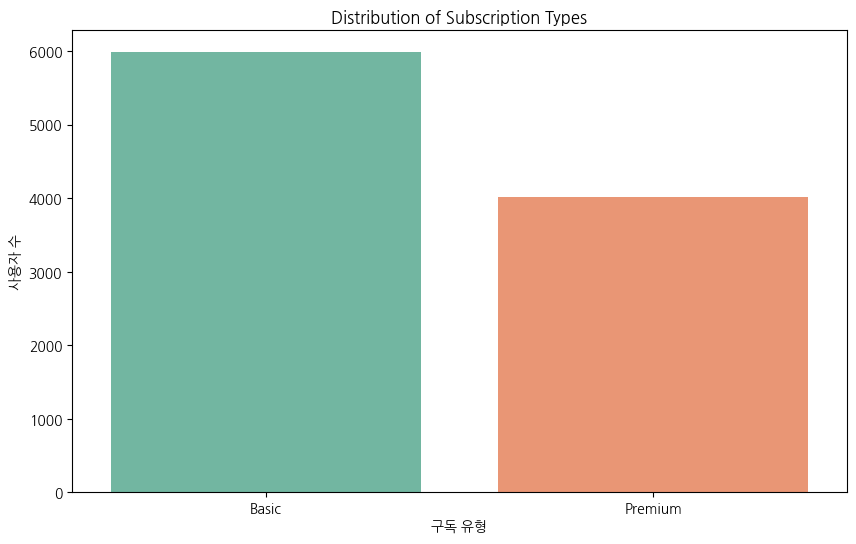

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='subscription_type', hue='subscription_type', palette='Set2', legend=False)
plt.title('Distribution of Subscription Types')
plt.xlabel('구독 유형')
plt.ylabel('사용자 수')

plt.savefig('Distribution of Subscription Types.png')
plt.show()

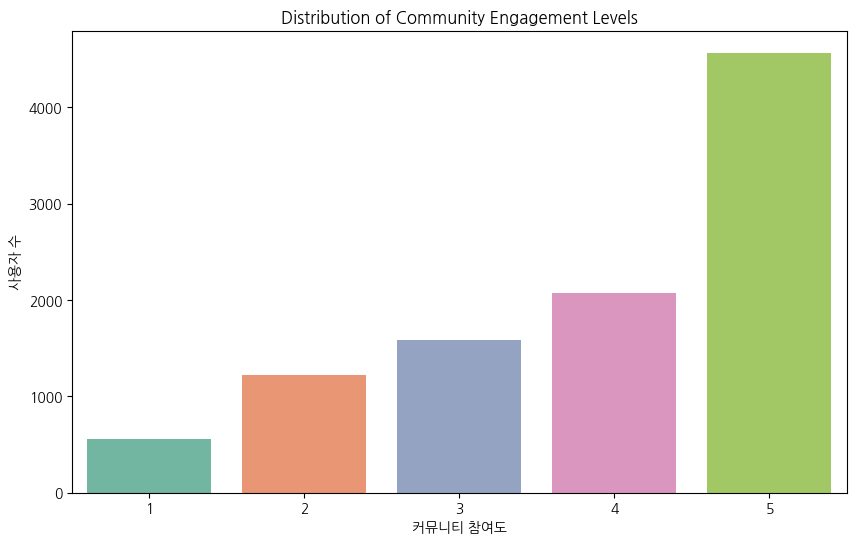

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='community_engagement_level', hue='community_engagement_level', palette='Set2', legend=False)
plt.title('Distribution of Community Engagement Levels')
plt.xlabel('커뮤니티 참여도')
plt.ylabel('사용자 수')
plt.savefig('Distribution of Community Engagement Levels.png')
plt.show()

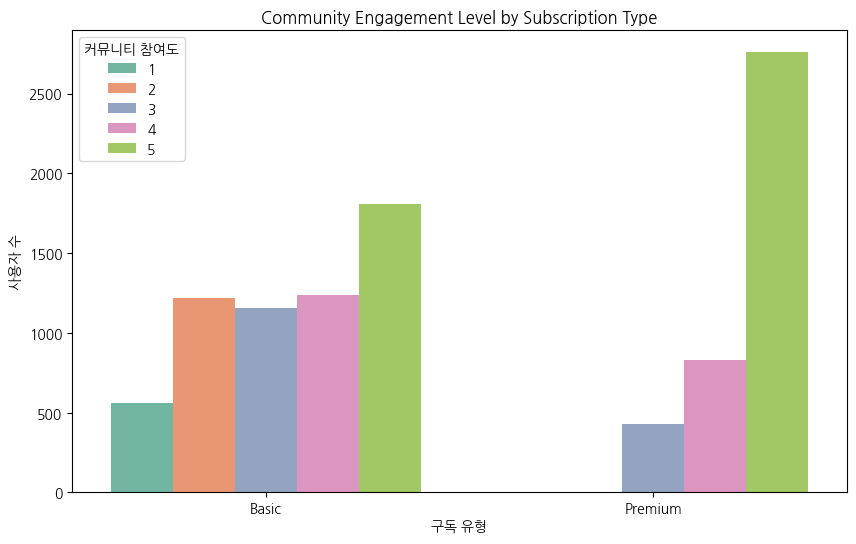

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='subscription_type', hue='community_engagement_level', palette='Set2')
plt.title('Community Engagement Level by Subscription Type')
plt.xlabel('구독 유형')
plt.ylabel('사용자 수')
plt.legend(title='커뮤니티 참여도')
plt.savefig('Community Engagement Level by Subscription Type.png')

plt.show()

✔️프리미엄 사용자가 커뮤니티 레벨 5의 비중이 높다.

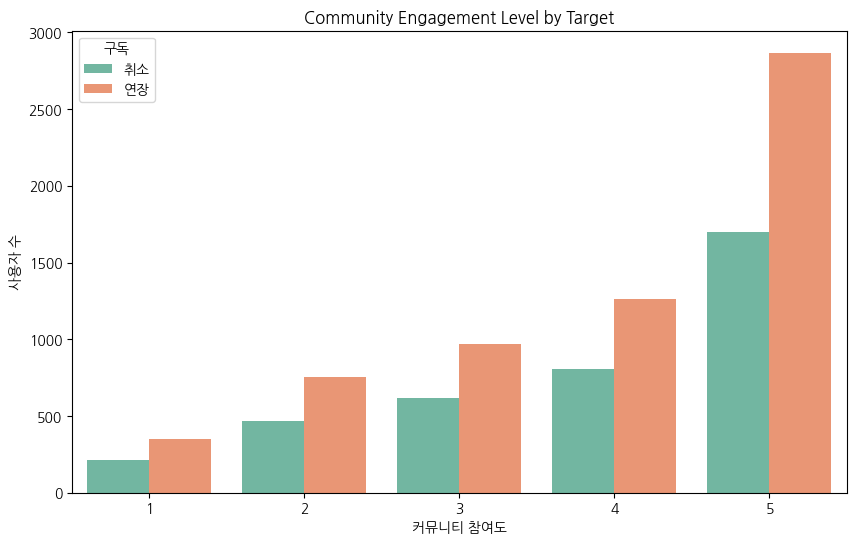

In [137]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='community_engagement_level', hue='target', palette='Set2')
plt.title('Community Engagement Level by Target')
plt.xlabel('커뮤니티 참여도')
plt.ylabel('사용자 수')
plt.legend(title='구독', labels=['취소', '연장'])
plt.savefig('Community Engagement Level by Target.png')

plt.show()

✔️그래서 구독 연장과 분석해보았지만, 관련성은 다음과 같이 없다. 레벨 5의 비중이 높다는 것만 알 수 있다. -> 그렇다면 사용자들은 커뮤니티에서 어떤 걸 주로 얘기하는지 궁금

# 완료한 총 코스 수와 성취도

In [70]:
achievement_stats = data['recent_learning_achievement'].describe()
print(achievement_stats)

count    10000.000000
mean        75.029513
std          9.968529
min         35.941755
25%         68.278054
50%         75.126061
75%         81.718976
max        112.643828
Name: recent_learning_achievement, dtype: float64


In [80]:
achievement_100 = data[data['recent_learning_achievement'] >= 100]['recent_learning_achievement']
print(achievement_100, len(achievement_100))

37      104.157237
243     103.630210
328     100.135640
333     103.049387
547     105.318001
687     101.023020
791     101.160898
890     101.766371
905     101.905012
1149    102.324982
1321    101.570754
1439    101.200329
1457    101.661920
1591    106.102230
1743    103.178349
1901    101.066834
2188    102.660934
2274    106.385512
2514    100.200730
2561    111.219647
2714    101.727536
2958    100.188238
3215    100.300376
3410    101.150779
4069    100.383001
4134    102.288523
4289    105.074082
4580    100.082805
4632    100.650734
4846    100.144342
5061    100.538566
5220    101.535255
5390    107.135153
5394    104.585023
5617    100.004153
5843    112.643828
6099    105.393308
6281    102.306401
6643    100.441425
6806    100.916931
7148    108.127099
7506    103.762162
7846    101.203933
7861    106.942927
7922    101.203661
7981    104.812784
8314    101.085176
8322    102.003670
8394    109.686851
8549    101.385671
8917    100.265149
9033    100.773346
9231    102.

✔️ 성취도 max 값이 112점이어서 100점 이상인 값만 정렬. 58개로 전체 데이터의 0.6% 정도이다. -> 이상치는 아닌 거 같다.(멘토님 도움)

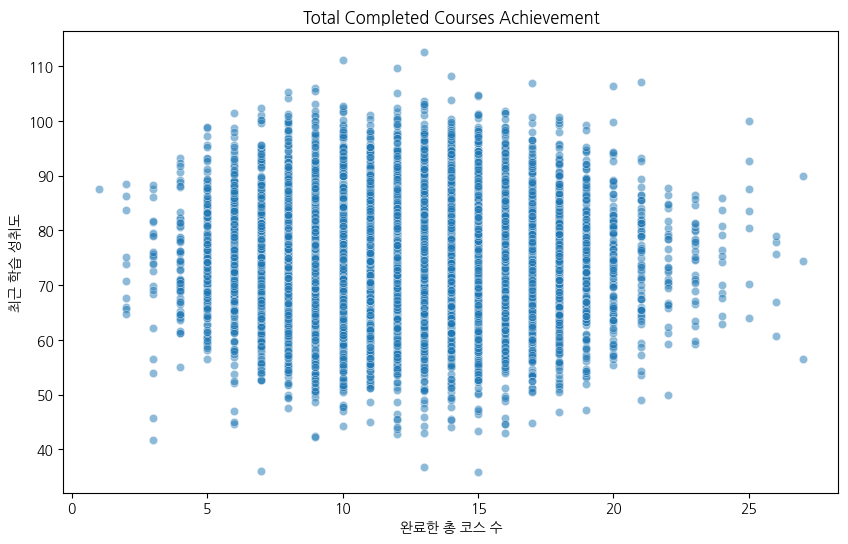

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_completed_courses', y='recent_learning_achievement', alpha=0.5)
plt.title('Total Completed Courses Achievement')
plt.xlabel('완료한 총 코스 수')
plt.ylabel('최근 학습 성취도')

plt.savefig('Total Completed Courses Achievement.png')
plt.show()

✔️ 생각보다 골고루 분포, 완료한 코스 수에 따라 대체적으로 성취도가 좋은 편이긴 하지만 특정 완료 수와는 관계없다.

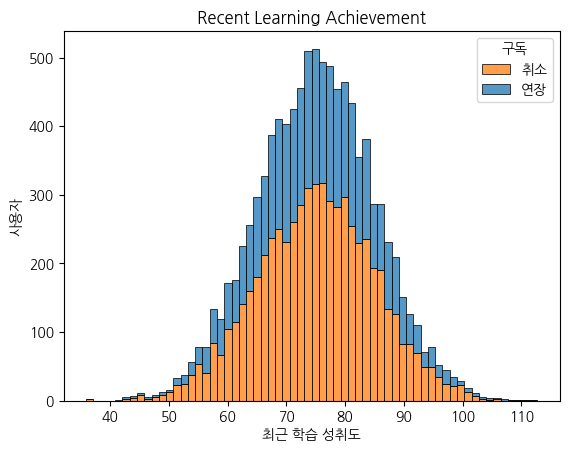

In [145]:
sns.histplot(data=data, x='recent_learning_achievement', hue='target', multiple='stack')
plt.title('Recent Learning Achievement')
plt.xlabel('최근 학습 성취도')
plt.ylabel('사용자')
plt.legend(title='구독', labels=['취소', '연장'])
plt.savefig('Recent Learning Achievement.png')
plt.show()

✔️ 하지만 앞서 본 전체 상관 분석을 통해 알 수 있듯이 구독 연장과는 큰 연관이 없다. 그렇다면 레벨 별 성취도는 어떨까? -> 난이도 조절 -> 구독 연장에 영향이 갈 것으로 예측

In [94]:
level = data['preferred_difficulty_level'].describe()
print(level)

count    10000.000000
mean         0.700800
std          0.780859
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: preferred_difficulty_level, dtype: float64


In [99]:
data['preferred_difficulty_level'] = data['preferred_difficulty_level'].map({0: 'Low', 1: 'Medium', 2: 'High'})

In [106]:
df['recent_learning_achievement_bins'] = pd.cut(df['recent_learning_achievement'], bins=range(30, 113, 10))

In [107]:
pivot_df = df.pivot_table(index='recent_learning_achievement_bins', columns='preferred_difficulty_level', values='user_id', aggfunc='count')

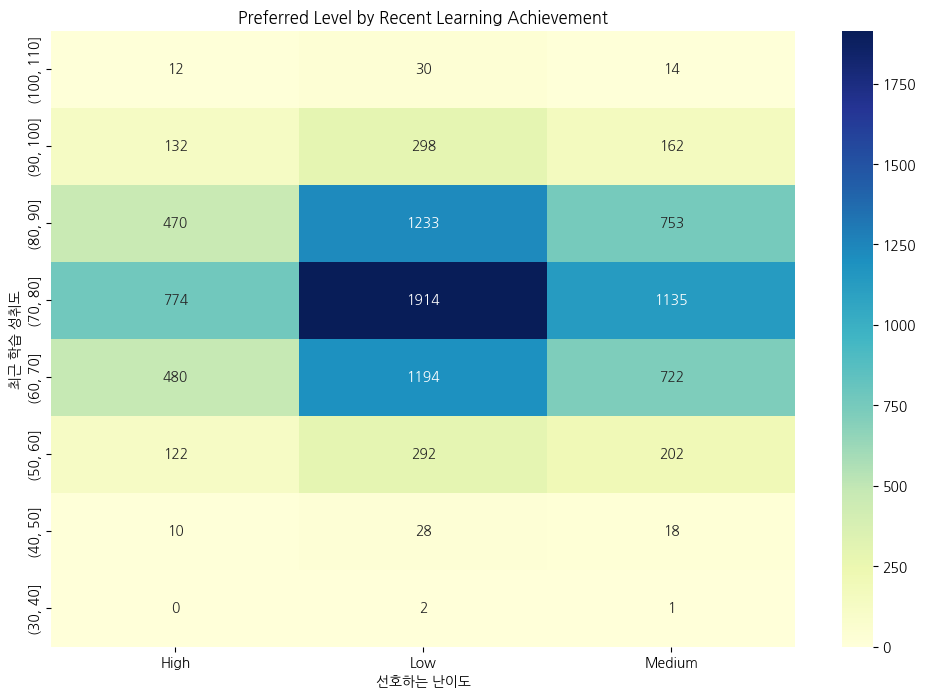

In [139]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='g')
plt.gca().invert_yaxis()
plt.title('Preferred Level by Recent Learning Achievement')
plt.xlabel('선호하는 난이도')
plt.ylabel('최근 학습 성취도')

plt.savefig('Preferred Level by Recent Learning Achievement.png')
plt.show()

✔️ 히트맵을 보아 낮은 레벨에 70~80 구간 사용자들의 성취도가 몰려있는 것을 알 수 있다.     
구독 연장 여부와 성취도 간의 상관관계가 적다는 것을 이미 확인하여 미디엄과 하이 난이도의 성취도를 높인다고 해서 구독 연장이 직접적으로 증가할 가능성은 낮을 수 있다.    
그러나 난이도 조절이 전반적인 사용자 만족도와 학습 경험에 미치는 영향을 미칠 수 있다.     
즉, 구독 연장에 간접적인 긍정적인 영향을 미칠 순 있다. (A/B 테스트)

In [111]:
difficulty_level_counts = df['preferred_difficulty_level'].value_counts()

In [113]:
difficulty_level_df = difficulty_level_counts.reset_index()
difficulty_level_df.columns = ['Preferred Difficulty Level', 'Count']
print(difficulty_level_df)

  Preferred Difficulty Level  Count
0                        Low   4992
1                     Medium   3008
2                       High   2000


# 학습 세션에 소요된 평균 시간

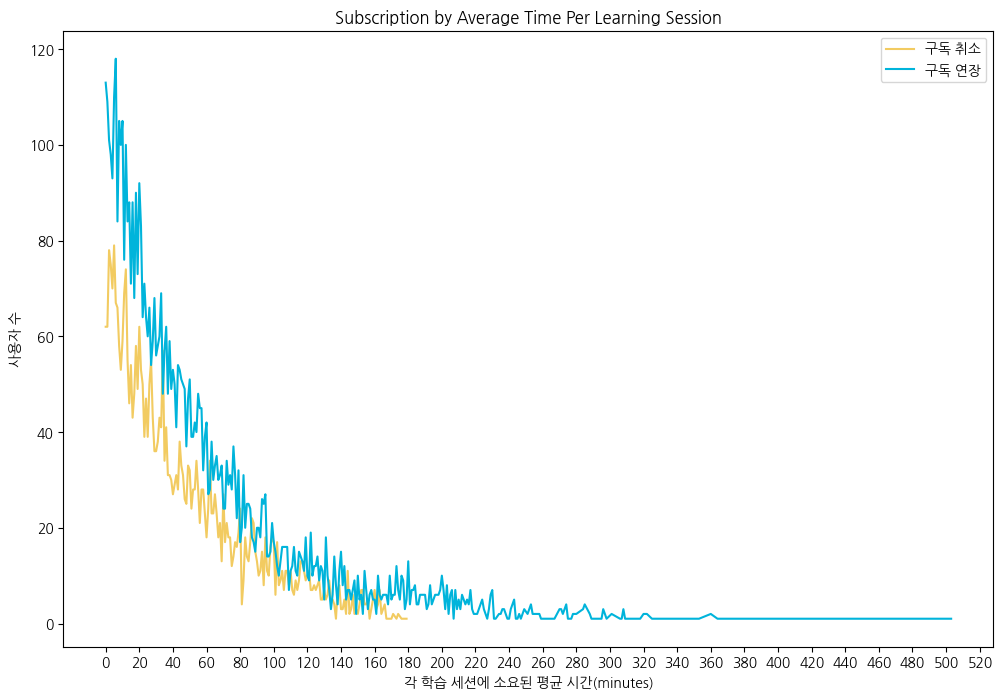

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['average_time_per_learning_session'] = np.floor(df['average_time_per_learning_session'])

target_0 = df[df['target'] == 0].groupby('average_time_per_learning_session').size()
target_1 = df[df['target'] == 1].groupby('average_time_per_learning_session').size()

plt.figure(figsize=(12, 8))

plt.plot(target_0.index, target_0.values, label='구독 취소', color='#F2CB61')

plt.plot(target_1.index, target_1.values, label='구독 연장', color='#00B4DB')

plt.title('Subscription by Average Time Per Learning Session')
plt.xlabel('각 학습 세션에 소요된 평균 시간(minutes)')
plt.ylabel('사용자 수')
plt.xticks(np.arange(0, df['average_time_per_learning_session'].max() + 20, 20))
plt.legend()

plt.savefig('Subscription by Average Time Per Learning Session.png')
plt.show()

In [122]:
average_time_per_learning_session_stats = data['average_time_per_learning_session'].describe()
print(average_time_per_learning_session_stats)

count    10000.000000
mean        54.917720
std         56.024310
min          0.011515
25%         15.276611
50%         37.578818
75%         75.584200
max        503.372616
Name: average_time_per_learning_session, dtype: float64
